In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Text(0,0.5,'Probability')

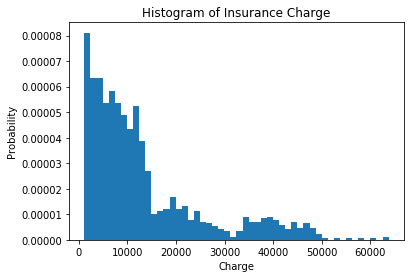

In [4]:
plt.hist(df.charges, bins= 50, normed=True);
plt.title("Histogram of Insurance Charge")
plt.xlabel("Charge")
plt.ylabel("Probability")

Text(0.5,1,'Boxplot of insurance charge')

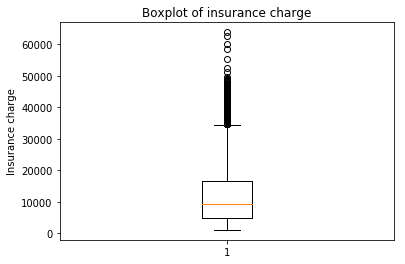

In [5]:
plt.boxplot(df.charges);
plt.ylabel("Insurance charge")
plt.title("Boxplot of insurance charge")

Upper whisker = min(max value, Q3 + 1.5 IQR)

Lower whisker = max(min value, Q1 - 1.5 IQR)

Outliers = value > Upper whisker or value < lower whisker

Text(0.5,1,'Boxplot of insurance charge')

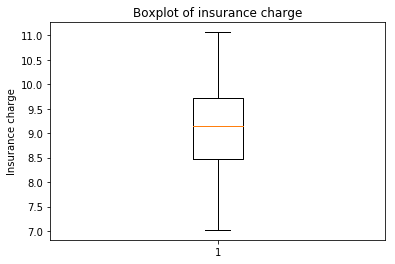

In [6]:
plt.boxplot(np.log(df.charges));
plt.ylabel("Insurance charge")
plt.title("Boxplot of insurance charge")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


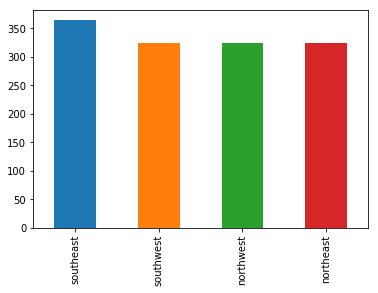

In [8]:
df.region.value_counts().plot.bar()

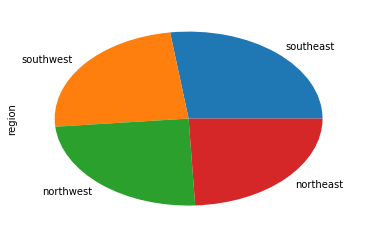

In [9]:
df.region.value_counts().plot.pie() 
# Generally do not use if the values are in the same range

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


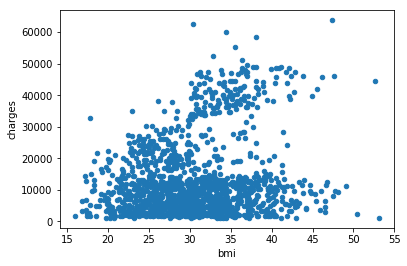

In [11]:
df.plot.scatter("bmi", "charges")

In [12]:
np.corrcoef(df.charges, df.bmi)[0, 1]

0.19834096883362887

Text(0.5,1,'Mean charges by region')

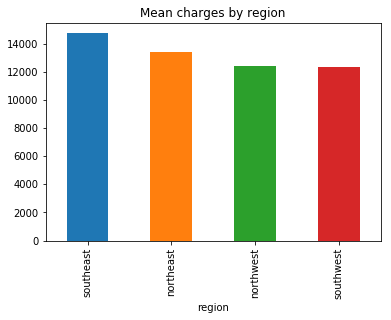

In [13]:
df.groupby("region").charges.mean()\
    .sort_values(ascending = False).plot.bar()
plt.title("Mean charges by region")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [15]:
agg = df.groupby(["region", "sex"]).charges.mean().unstack()
agg

sex,female,male
region,,
northeast,12953.203151,13854.005374
northwest,12479.870397,12354.119575
southeast,13499.669243,15879.617173
southwest,11274.411264,13412.883576


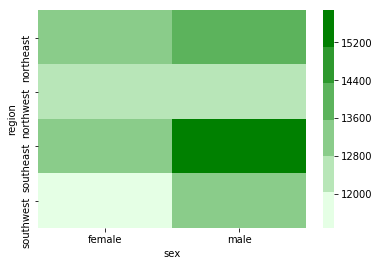

In [16]:
colors = sns.light_palette("green")
sns.heatmap(agg, cmap=colors)

In [19]:
df = pd.read_csv("/data/NVDA.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-21,108.230003,111.230003,108.220001,111.070000,110.638954,13798800
1,2017-02-22,111.419998,111.800003,109.989998,110.760002,110.469391,10844300
2,2017-02-23,105.500000,106.389999,99.680000,100.489998,100.226341,39822200
3,2017-02-24,97.070000,102.000000,95.699997,101.459999,101.193794,25747600
4,2017-02-27,102.199997,105.019997,101.559998,104.410004,104.136063,17885000


In [20]:
df["dt"] = pd.to_datetime(df.Date)

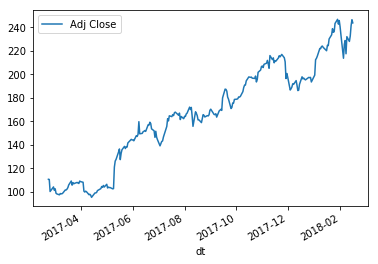

In [22]:
df.plot.line("dt", "Adj Close")